### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the top business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


Recharging of the service: There are several variables that describe the duration, maximum, total amount and average of the recharge price of the service they avail, which include the 2G service, the 3G service, internet packages and call services
  - av_rech_amt_data: Average recharge data amount
  - count_rech_2g: Number of customers using 2G
  - count_rech_3g: Number of customers using 3G
  - max_rech_data: Maximum recharge for mobile internet
  - total_rech_data: Total recharge for mobile internet
  - max_rech_amt: Maximum recharge amount
  - total_rech_amt: Total recharge amount
  - total_rech_num: Total number of times customer recharged

# Task 1: Importing the required libraries and loading the data set

In [79]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# read the data
churn = pd.read_csv("/content/drive/MyDrive/upGrad/Capstone/telecom_churn_data.csv")

# Task 2: Understanding and exploring the data 

In [82]:
# look at initial rows of the data
churn.head(10)
print(churn.shape)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252

(99999, 225)


In [83]:
# summary of different feature types
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    last_date_of_month_9      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   arpu_9                    float64
 12   onnet_mou_6               float64
 13   onnet_mou_7               float64
 14   onnet_mou_8               float64
 15   onnet_mou_9               float64
 16   offnet_mou_6              float64
 17   offnet_mou_7              float64
 18   offnet_mou_8              float64
 19   offnet_mou_9              float64
 20   roam

In [84]:
# analysis of data statistics
churn.describe(include='all')

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0000

In [85]:
# create backup of data
original = churn.copy()

In [86]:
# create column name list by types of columns
id_cols = ['circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 1
#Date cols:12
#Numeric cols:204
#Category cols:8
True


# Handling missing values

In [87]:
# look at missing value ratio in each colum
percent_missing = (churn.isnull().sum()/len(churn))*100
missing_value_ratio = pd.DataFrame({'column_name':churn.columns , 'percent_missing': percent_missing})
missing_value_ratio.sort_values(by=['percent_missing'], ascending=False)

,column_name,percent_missing
arpu_3g_6,arpu_3g_6,74.846748
av_rech_amt_data_6,av_rech_amt_data_6,74.846748
fb_user_6,fb_user_6,74.846748
night_pck_user_6,night_pck_user_6,74.846748
total_rech_data_6,total_rech_data_6,74.846748
max_rech_data_6,max_rech_data_6,74.846748
count_rech_2g_6,count_rech_2g_6,74.846748
count_rech_3g_6,count_rech_3g_6,74.846748
date_of_last_rech_data_6,date_of_last_rech_data_6,74.846748
arpu_2g_6,arpu_2g_6,74.846748


- Observations

There are few features that contain more than 70% missing values or records.Also there are other features that also contains missing values.
We need to perform some imputing and deleting for the missing values because missing value can bias the results of the machine learning models and/or reduce the accuracy of the model.

### i) Impute missing values with zeroes

Now that we have the information about the amount of missing values in each column, we can go ahead and perform some imputing and deleting. 

First, we will start with the columns corresponding to the "recharging of the service" information. 

In [88]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [89]:
# Observe whether the date of the last recharge and the total recharge data value are missing together

#adding date_of_last_rech_data columns in 1 variable
last_rech_data = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

#adding total_rech_data colmuns in 1 variable
total_rech_data = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']

#displaying the rows that have null values in these two variables
print(print('\nLast_Recharge_Data\n'))
churn[last_rech_data].isnull().head()
print(print('\nTotal_Recharge_Data\n'))
churn[total_rech_data].isnull().head()


Last_Recharge_Data

None


,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,False,False,False,True
1,True,False,False,True
2,True,True,True,False
3,True,True,True,True
4,False,True,True,True



Total_Recharge_Data

None


,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,False,False,False,True
1,True,False,False,True
2,True,True,True,False
3,True,True,True,True
4,False,True,True,True


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [90]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [91]:
# impute missing values with 0 for the above mentioned list of recharge columns
for col in zero_impute:
  churn[col].fillna(0, inplace=True)

In [92]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(churn[zero_impute].isnull().sum()*100/churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [93]:
# drop id and all the date columns
print("Shape before dropping: ", churn.shape)

churn.drop(columns =['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9','circle_id'], inplace =True)

print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 225)
Shape after dropping:  (99999, 212)


### ii) Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [94]:
# Check the missing values ratio in the categorical variables
churn[cat_cols].isnull().sum()*100/churn.shape[1]

night_pck_user_6    35304.716981
night_pck_user_7    35107.547170
night_pck_user_8    34745.283019
night_pck_user_9    34941.981132
fb_user_6           35304.716981
fb_user_7           35107.547170
fb_user_8           34745.283019
fb_user_9           34941.981132
dtype: float64

In [95]:
# replace missing values with '-1' in categorical columns

for col in cat_cols:
  churn[col].fillna(-1, inplace=True)

In [96]:
# missing value ratio
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[1])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [97]:
churn[cat_cols].isnull().any()

night_pck_user_6    False
night_pck_user_7    False
night_pck_user_8    False
night_pck_user_9    False
fb_user_6           False
fb_user_7           False
fb_user_8           False
fb_user_9           False
dtype: bool

### iii) Drop variables with more than a given threshold of missing values

Here, we will be removing the column variables that have more than 70% of its elements missing. 

In [98]:
churn.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.2,3.58
1,0.0,0.0,0.0,34.047,355.074

In [99]:
from dataclasses import MISSING
initial_cols = churn.shape[1]
print(initial_cols)
# Insert the threshold value of missing entries
MISSING_THRESHOLD = round((99999/100)*70)
print(MISSING_THRESHOLD)

# Extract a list of columns that have less than the threshold of missing values 
cols_less_missing = [col for col in churn.columns if churn[col].isnull().sum() < MISSING_THRESHOLD]


212
69999


In [100]:
# Include the columns extracted in the above list in the main data set 
# These columns will have the percentage of missing values less than the threshold
churn = churn[cols_less_missing]

# Display the number of columns dropped
print('Number of columns dropped:', int(original.shape[1]-churn.shape[1]))

Number of columns dropped: 29


In [101]:
# Missing value ratio in each column
percent_miss = churn.isnull().sum()*100/churn.shape[0]
missing_ratio = pd.DataFrame({'column_name': churn.columns, 'percent_missing': percent_miss})
missing_ratio.sort_values(by=['percent_missing'], ascending=False)

,column_name,percent_missing
std_ic_t2t_mou_9,std_ic_t2t_mou_9,7.745077
loc_og_t2t_mou_9,loc_og_t2t_mou_9,7.745077
loc_og_t2f_mou_9,loc_og_t2f_mou_9,7.745077
loc_og_t2c_mou_9,loc_og_t2c_mou_9,7.745077
loc_og_mou_9,loc_og_mou_9,7.745077
std_og_t2t_mou_9,std_og_t2t_mou_9,7.745077
std_og_t2m_mou_9,std_og_t2m_mou_9,7.745077
std_og_t2f_mou_9,std_og_t2f_mou_9,7.745077
std_og_mou_9,std_og_mou_9,7.745077
isd_og_mou_9,isd_og_mou_9,7.745077


### iv) Impute missing values using MICE

In [102]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

So, we will be using linear regression for filling the missing values in the rest of the numeric columns.

In [103]:
churn_cols = churn.columns

# using MICE technique to impute missing values in the rest of the columns
lr = LinearRegression()

# Implement the Iterative Imputer technique to impute appropriate values in the missing entries of the rest of the numeric columns
imp = IterativeImputer(estimator = lr , missing_values= np.nan, max_iter = 1,
                       verbose=2, imputation_order = 'roman', random_state = 0)


# Transform the data
churn = imp.fit_transform(churn)

[IterativeImputer] Completing matrix with shape (99999, 196)
[IterativeImputer] Ending imputation round 1/1, elapsed time 169.41
[IterativeImputer] Change: 242798.34844752384, scaled tolerance: 45.735400000000006 


In [104]:
churn

array([[   0.  ,    0.  ,    0.  , ...,    0.  ,  101.2 ,    3.58],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    4.17,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ..., 1151.03, 1173.18,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [105]:
# convert imputed numpy array to pandas dataframe
churn = pd.DataFrame(churn, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [106]:
churn.sample(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
76445,0.0,0.0,0.0,510.526,678.740,406.066,939.215,410.01,418.81,304.36,848.34,294.06,197.59,205.09,197.86,0.0,27.64,0.0,0.0,0.0,15.99,0.0,0.0,410.01,412.46,304.36,848.34,248.89,127.63,169.71,110.29,1.46,1.79,7.66,1.63,0.0,0.0,12.38,0.0,660.38,541.89,481.74,960.28,0.0,0.0,0.0,0.0,43.69,55.61,13.73,85.93,0.0,2.9,0.0,0.0,0.0,0.0,0.0,0.0,43.69,58.51,13.73,85.93,0.0,0.0,0.0,0.0,0.0,0.0,13.98,0.0,0.0,0.0,0.0,0.0,704.08,600.41,509.46,1046.21,464.51,252.73,167.94,886.23,278.38,182.51,126.29,109.73,0.00,0.00,6.99,3.95,742.89,435.24,301.24,999.91,0.0,0.0,0.0,0.0,125.58,187.18,47.71,112.36,0.0,4.08,0.00,0.0,0.0,0.0,0.0,0.0,125.58,191.26,47.71,112.36,868.58,626.76,348.96,1112.28,0.0,0.0,0.0,0.00,0.0,0.25,0.0,0.0,0.10,0.00,0.00,0.00,6.0,8.0,7.0,10.0,520.0,764.0,668.0,972.0,152.0,152.0,152.0,152.0,0.0,152.0,0.0,130.0,2.0,4.0,2.0,6.0,152.0,152.0,152.0,152.0,304.0,608.0,304.0,912.0,11.05,63.46,42.45,67.31,1041.5,1002.33,821.06,1743.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,331.0,767.17,708.42,742.75,602.38
38891,0.0,0.0,0.0,130.430,133.872,130.447,42.966,0.00,0.00,0.00

In [107]:
# FInal checking for missing values 
churn.isnull().any()

loc_og_t2o_mou        False
std_og_t2o_mou        False
loc_ic_t2o_mou        False
arpu_6                False
arpu_7                False
arpu_8                False
arpu_9                False
onnet_mou_6           False
onnet_mou_7           False
onnet_mou_8           False
onnet_mou_9           False
offnet_mou_6          False
offnet_mou_7          False
offnet_mou_8          False
offnet_mou_9          False
roam_ic_mou_6         False
roam_ic_mou_7         False
roam_ic_mou_8         False
roam_ic_mou_9         False
roam_og_mou_6         False
roam_og_mou_7         False
roam_og_mou_8         False
roam_og_mou_9         False
loc_og_t2t_mou_6      False
loc_og_t2t_mou_7      False
loc_og_t2t_mou_8      False
loc_og_t2t_mou_9      False
loc_og_t2m_mou_6      False
loc_og_t2m_mou_7      False
loc_og_t2m_mou_8      False
loc_og_t2m_mou_9      False
loc_og_t2f_mou_6      False
loc_og_t2f_mou_7      False
loc_og_t2f_mou_8      False
loc_og_t2f_mou_9      False
loc_og_t2c_mou_6    

We can now see that we have removed or filled all the missing values from the data set. We will now proceed to feature engineering to further prepare the data for testing machine learning and deep learning models.

# Task 3: Feature engineering

### Filter high-value customers

### Calculate total data recharge amount

In [108]:
# calculate and store the total data recharge amount for June --> number of data recharges * average data recharge amount
# June, July, August and September - The months are encoded as 6, 7, 8 and 9, respectively.

churn['total_data_recharge_amt_6'] = churn.total_rech_num_6 * churn.av_rech_amt_data_6

# calculate and store the total data recharge amount for July --> number of data recharges * average data recharge amount

churn['total_data_recharge_amt_7'] = churn.total_rech_num_7 * churn.av_rech_amt_data_7

### Add total data recharge and total recharge to get total combined recharge amount for a month

In [109]:
# calculate and store total recharge amount for call and internet data for June --> total call recharge amount + total data recharge amount

churn['total_comb_rech_amt_6'] = churn.total_data_recharge_amt_6 + churn.total_rech_amt_6

# calculate and store total recharge amount for call and internet data for July --> total call recharge amount + total data recharge amount

churn['total_comb_rech_amt_7'] = churn.total_data_recharge_amt_7 + churn.total_rech_amt_7

In [110]:
churn.shape

(99999, 200)

In [111]:
# calculate average data recharge amount done by customer in June and July

avg_rech_data_amt = []

for i in range(0, 99999):
  a = (churn['total_data_recharge_amt_6'][i] + churn['total_data_recharge_amt_7'][i]) / 2
  avg_rech_data_amt.append(a)

In [112]:
# store
churn['avg_rech_data_amt'] = avg_rech_data_amt

In [113]:
# evaluate and display the 70th percentile average data recharge amount of June and July

avg_data_rech_amt_70_percent =  np.percentile(churn['avg_rech_data_amt'], 70)

avg_data_rech_amt_70_percent

102.0

In [114]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

retain_customers = churn['avg_rech_data_amt']>= avg_data_rech_amt_70_percent

churn = churn[retain_customers]

In [115]:
churn.shape

(30038, 201)

In [116]:
churn.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_data_recharge_amt_6', 'total_data_recharge_amt_7',
       'total_comb_rech_amt_6', 'total_comb_rech_amt_7', 'avg_rech_data_amt'],
      dtype='object', length=201)

In [117]:
# delete variables created to filter high-value customers

churn.drop(churn.iloc[:, -5:],axis = 1, inplace = True)

In [118]:
# Display the number of customers retained in the data set

print("The number of customers retained in the dataset is :", churn.shape[0])

The number of customers retained in the dataset is : 30038


In [119]:
churn.shape

(30038, 196)

### Derive churn

In [120]:
# calculate total incoming and outgoing minutes of usage for the month of September

churn['tot_ic_og_m_9'] = churn.total_ic_mou_9 + churn.total_og_mou_9

In [121]:
# calculate the total volumn of 2g and 3g data consumption for the month of September

churn['tot_vol_2g_3g_data_9'] =  churn.vol_2g_mb_9 + churn.vol_3g_mb_9

In [122]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

churn['churned'] = np.where((churn['tot_ic_og_m_9'] ==0 ) | (churn['tot_vol_2g_3g_data_9']==0), 1,0)

In [123]:
churn.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'sep_vbc_3g', 'tot_ic_og_m_9', 'tot_vol_2g_3g_data_9',
       'churned'],
      dtype='object', length=199)

In [124]:
# delete derived variables

churn.drop(churn.iloc[: , -3:-1], axis=1, inplace=True)

In [125]:
# previously the number of features was 196
# current shape 
churn.shape

(30038, 197)

In [126]:
from locale import normalize
# change the 'churn' variable data type to 'category'

churn['churned']= churn['churned'].astype("category")

# display the churn ratio

print("The churn ratio is:\n",churn['churned'].value_counts(normalize=True)*100)

The churn ratio is:
 0    58.079766
1    41.920234
Name: churned, dtype: float64


In [127]:
churn.churned.value_counts()

0    17446
1    12592
Name: churned, dtype: int64

The number of churned customers is 12592, which is around 42% of total records of the dataset.

<Figure size 1008x360 with 0 Axes>

Text(0.5, 1.0, 'Ratio of customers churn vs customers not churn')

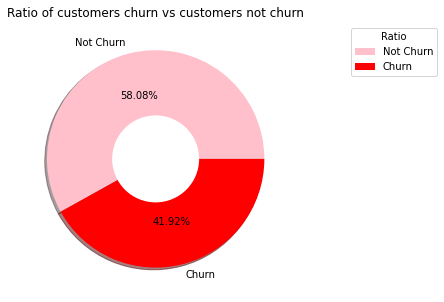

In [128]:
x = churn['churned'].value_counts(normalize=True)*100
# print(x)
plt.figure(figsize=(14, 5))
fig = plt.pie(data=churn, x = x, labels = ['Not Churn', 'Churn'],autopct='%1.2f%%',colors= ['pink', 'red'], shadow=True, radius=1)
centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Ratio of customers churn vs customers not churn")
plt.legend(bbox_to_anchor = (1.20, 1), title='Ratio')
plt.show()

### Calculate difference between 8th and previous months

Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [129]:
cols =  ['arpu',
         'onnet_mou',
         'offnet_mou',
         'roam_ic_mou',
         'roam_og_mou',
         'loc_og_mou',
         'std_og_mou',
         'isd_og_mou',
         'spl_og_mou',
         'total_og_mou',
         'loc_ic_mou',
         'std_ic_mou',
         'isd_ic_mou',
         'spl_ic_mou',
         'total_ic_mou',
         'total_rech_num',
         'total_rech_amt',
         'max_rech_amt',
         'total_rech_data',
         'max_rech_data',
         'av_rech_amt_data',
         'vol_2g_mb',
         'vol_3g_mb'
         ]

# Create new columns that hold the value of the difference between the variable value 
# in the month of August and average of the variable values in the month of June and July

for i in cols:
  churn[i + '_diff'] = (churn[i + '_8']) - ((churn[i + '_6'] + churn[i + '_7']) / 2)


In [130]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churned,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-1632.701045,2560.146865,0.00,4676.889687,-953.241189,123.988246,0.00,979.673208,40467.334859,45369.889264,0.0,53184.426409,1250.593357,2760.079309,0.0,1737.698082,40.515091,27.758264,0.00,29.701712,92.101799,90.25919,0.00,90.35231,3.685689,3.749523,0.0,3.654604,-6685.375052,-7829.443045,0.00,-10340.736929,10.467919,-14.606917,0.00,-17.339163,90.20217,93.185894,0.00,92.04229,87.920876,91.303689,0.00,86.284026,1.148555,1.127912,0.0,1.10457,0.0,0.0,0.0,0.0,121.681391,126.724545,0.00,122.492241,-115.980239,-102.010449,0.0,-100.509952,-3.855625,-0.516755,0.00,3.876311,0.124407,-0.158606,0.0,0.024023,0.00,0.00,0.00,0.00,52.901143,46.495706,0.16,52.536222,107.265931,106.966626,4.13

In [131]:
# let's look at summary of one of the difference variables
# The variable mentioned below is the total outgoing calls minutes of usage difference between the total OG MOU in August and average of the total OG MOU of June and July

churn['total_og_mou_diff'].describe()

count    30038.000000
mean       -16.456625
std        342.383906
min      -7213.410000
25%        -65.422500
50%         -2.725000
75%         41.348750
max       5255.385000
Name: total_og_mou_diff, dtype: float64

In [132]:
churn.shape

(30038, 220)

Delete columns that belong to the churn month (9th month)

In [133]:
# delete all variables relating to 9th month

regex_str = '_9'
churn.drop(churn.columns[churn.columns.str.contains(regex_str)], axis = 1, inplace= True)

In [134]:
churn.shape

(30038, 173)

In [135]:
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [136]:
# update num_cols and cat_cols column name list

# extract all names that end with 9
nc_ew_9 = list(filter(lambda x: x.endswith('9'), num_cols))
cc_ew_9 = list(filter(lambda x: x.endswith('9'), cat_cols))

# update cal_cols so that all the variables related to the month of September are removed

for i in num_cols:
  if i in nc_ew_9:
    num_cols.remove(i)

# update cal_cols so that all the variables related to the month of September are removed

for i in cat_cols:
  if i in cc_ew_9:
    cat_cols.remove(i)

In [137]:
churn.shape

(30038, 173)

Finally our dataset consists of 30038 records and 173 features, which we will be using for analysis.

# Task 4: Data Visualization

In [138]:
# ensure that all the numerical and categorical columns are of the correct data types

churn[cat_cols] = churn[cat_cols].astype("category")
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30038 entries, 0 to 99998
Data columns (total 173 columns):
 #    Column                 Dtype   
---   ------                 -----   
 0    loc_og_t2o_mou         float64 
 1    std_og_t2o_mou         float64 
 2    loc_ic_t2o_mou         float64 
 3    arpu_6                 float64 
 4    arpu_7                 float64 
 5    arpu_8                 float64 
 6    onnet_mou_6            float64 
 7    onnet_mou_7            float64 
 8    onnet_mou_8            float64 
 9    offnet_mou_6           float64 
 10   offnet_mou_7           float64 
 11   offnet_mou_8           float64 
 12   roam_ic_mou_6          float64 
 13   roam_ic_mou_7          float64 
 14   roam_ic_mou_8          float64 
 15   roam_og_mou_6          float64 
 16   roam_og_mou_7          float64 
 17   roam_og_mou_8          float64 
 18   loc_og_t2t_mou_6       float64 
 19   loc_og_t2t_mou_7       float64 
 20   loc_og_t2t_mou_8       float64 
 21   loc_og_t2m

In [139]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

## Univariate EDA

count    30038.000000
mean       381.122384
std        368.135181
min        -88.306000
25%        153.892750
50%        286.036000
75%        499.068750
max      15487.684000
Name: arpu_6, dtype: float64


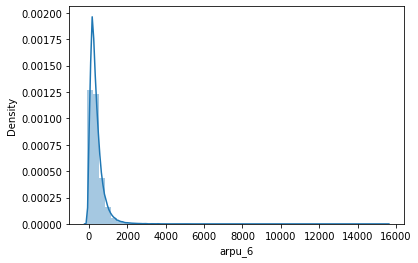

In [140]:
# Plot the average revenue per user in June

univariate(churn['arpu_6'])

count    30038.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


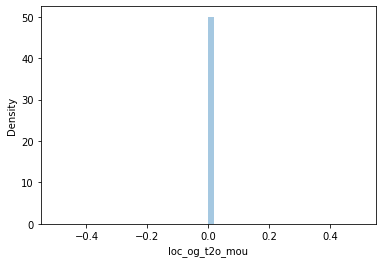

In [141]:
# Plot the minutes of usage of local (within same telecom circle) outgoing calls of Operator T to other operator fixed line

univariate(churn.loc_og_t2o_mou)

count    30038.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


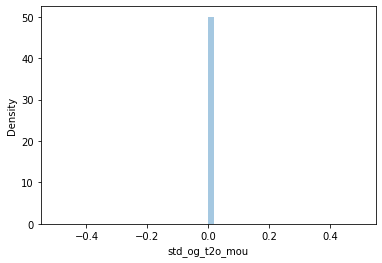

In [142]:
# Plot the minutes of usage of STD (outside the calling circle) outgoing calls of Operator T to other operator fixed line

univariate(churn['std_og_t2o_mou'])

count    30038.000000
mean       -64.470848
std        837.143863
min      -3217.920757
25%          1.230000
50%         21.410000
75%         96.575000
max       9977.410000
Name: onnet_mou_8, dtype: float64


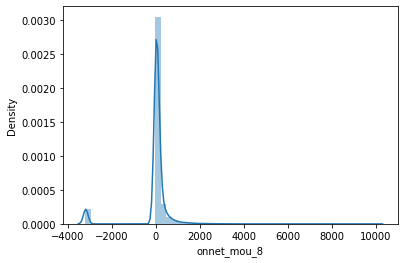

In [143]:
# Plot the minutes of usage of all kind of calls within the same operator network for the month of August

univariate(churn.onnet_mou_8)

count    92254.000000
mean       190.337222
std        319.396092
min          0.000000
25%         27.130000
50%         87.290000
75%        220.505000
max      10310.760000
Name: offnet_mou_9, dtype: float64


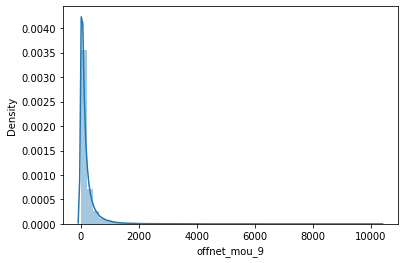

In [144]:
 # Plot the minutes of usage of all kind of calls outside the operator T network for the month of September

univariate(original.offnet_mou_9)

## Bivariate EDA

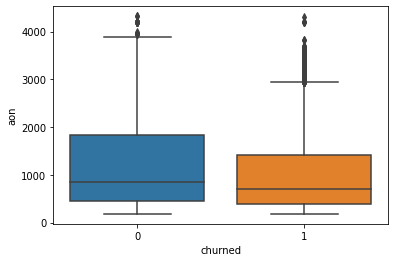

In [145]:
# Plot the relationship between whether the customer churned or not and the age on network (number of days the customer is using the operator T network)
bivariate(churn['churned'], churn['aon'])

Outliers are clearly visible in 'aon'.

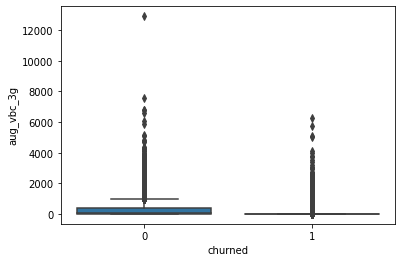

In [146]:
# Plot the relationship between the 3G volume based cost in Sept (when no specific scheme is not purchased and paid as per usage) and whether the customer churned or not
bivariate(churn['churned'], churn['aug_vbc_3g'])

It is clear that 'aug_vbc_3g' has outliers.

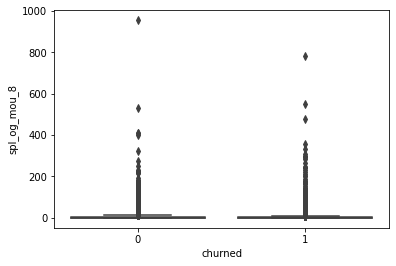

In [147]:
# Plot the relationship between the minutes of usage of special outgoing calls in the month of August and whether the customer churned or not
bivariate(churn['churned'], churn['spl_og_mou_8'])

In [148]:
# Plot the relationship between whether the customer churned or not and the night package used by users in August
pd.crosstab(churn['churned'], churn['night_pck_user_8'], normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churned,,,
0,23.472237,74.456903,77.377892
1,76.527763,25.543097,22.622108


In [149]:
# Plot the relationship between whether the customer churned or not and the 3G service schemes with validity smaller than a month for the month of August
pd.crosstab(churn['churned'], churn['monthly_3g_8'] < churn['sachet_3g_8'], normalize='columns')

col_0,False,True
churned,,
0,0.55741,0.790574
1,0.44259,0.209426


- Observation

There are outliers in the dataset as we can see during bivariate and univariate analysis for few features, so we need to examine the dataset more closely.

# Task 5: Outlier Treatment

### Cap outliers in all numeric variables

In [150]:
# function for capping outliers
def cap_outliers(array):

    # Get the 75% quantile of the array
    # Get the 25% quantile of the array
    # Get the interquartile range (IQR) (q3 - q1)

    q3 = np.quantile(array,0.75)
    q1 = np.quantile(array,0.25)
    IQR = (q3 - q1)

    # Calculate the upper limit - 75% quartile + 1.5*IQR
    # Calculate the lower limit - 25% quartile - 1.5*IQR

    upper_limit = q3 + (1.5*IQR)
    lower_limit = q1 - (1.5*IQR)

    # Perform outlier capping
    # Set all the values in the array above the upper limit to be equal to the upper limit
    # Set all the values in the array below the lower limit to be equal to the lower limit

    array = np.where(array > upper_limit, upper_limit, 
                     np.where(array < lower_limit, lower_limit, array))

    return array

In [151]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999
sample_array[10] =9999
# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array))

Array after capping outliers: 
 [-48.5   1.    2.    3.    4.    5.    6.    7.    8.    9.  149.5  11.
  12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
  24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
  36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
  48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
  60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
  72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
  84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
  96.   97.   98.  149.5]


In [152]:
# cap outliers in all the numeric columns using your outlier capping function
a = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
     'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
     'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
     'arpu_2g_7', 'arpu_2g_8']
for i in num_cols:
  if i not in a:
    cap_outliers(churn[i])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([197.385,  34.047, 261.636, ...,  35.793, 322.991, 687.065])

array([214.816, 355.074, 309.876, ..., 126.941, 303.386,   0.   ])

array([213.803, 268.321, 238.174, ...,   0.   , 606.817,   0.   ])

array([-154.85125,   24.11   ,   50.31   , ...,    0.     ,    0.     ,
         84.34   ])

array([324.755,  78.68 , 149.44 , ...,   0.98 ,   0.   , 324.755])

array([   0.    ,    7.68  ,   83.89  , ...,    0.    ,    0.    ,
       -141.7875])

array([-314.88125,   15.74   ,   76.96   , ...,   15.73   ,    0.     ,
        166.46   ])

array([123.98824593,  99.84      ,  91.88      , ...,  59.64      ,
         0.        , 120.77410556])

array([  0.        , 304.76      , 124.26      , ...,   0.        ,
         0.        , 494.71922979])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([40.51509072, 23.88      , 50.31      , ...,  0.        ,
        0.        , 84.34      ])

array([ 27.75826447,  74.56      , 110.205     , ...,   0.        ,
         0.        ,  27.75699262])

array([ 0.       ,  7.68     , 83.89     , ...,  0.       ,  0.       ,
       27.7039376])

array([ 92.10179947,  11.51      ,  67.64      , ...,   0.26      ,
         0.        , 166.46      ])

array([90.25918973, 75.94      , 91.88      , ...,  0.51      ,
        0.        , 90.25901079])

array([  0.        , 286.4775    , 124.26      , ...,   0.        ,
         0.        ,  90.93965219])

array([3.68568862, 0.        , 0.        , ..., 0.16      , 0.        ,
       0.        ])

array([3.74952253, 0.        , 0.        , ..., 0.48      , 0.        ,
       3.74960131])

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       3.65365891])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([ 10.46791931,  35.39      , 117.96      , ...,   0.43      ,
         0.        , 250.81      ])

array([-14.60691743, 150.51      , 241.33      , ...,   0.99      ,
         0.        , -14.6064889 ])

array([  0.       , 299.54     , 208.16     , ...,   0.       ,
         0.       , -16.5618805])

array([58.0625,  0.23  ,  0.    , ...,  0.    ,  0.    ,  0.    ])

array([61.35,  4.11,  0.  , ...,  0.98,  0.  , 61.35])

array([ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 68.075])

array([87.92087629,  0.        ,  9.31      , ...,  9.49      ,
        0.        ,  0.        ])

array([91.30368861,  0.46      ,  0.        , ..., 50.63      ,
        0.        , 91.30401385])

array([ 0.       ,  0.13     ,  0.       , ...,  0.       ,  0.       ,
       90.3233855])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([121.68139073,   0.23      ,   9.31      , ...,   9.49      ,
         0.        ,   0.        ])

array([126.72454455,   4.58      ,   0.        , ...,  51.61      ,
         0.        , 126.72432669])

array([  0.        ,   0.13      ,   0.        , ...,   0.        ,
         0.        , 126.05572614])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([-3.85562456,  4.68      ,  0.        , ...,  5.99      ,
        0.        ,  1.18      ])

array([-0.51675484, 14.4       ,  0.        , ..., 14.4       ,
        0.        , -0.51701853])

array([ 0.        , 12.76      ,  0.        , ...,  0.16      ,
        0.        ,  0.87439801])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([  0.  ,  40.31, 127.28, ...,  17.18,   0.  , 269.93])

array([  0.  , 178.53, 241.33, ...,  78.76,   0.  ,   0.  ])

array([0.0000e+00, 3.1244e+02, 2.0816e+02, ..., 1.6000e-01, 0.0000e+00,
       0.0000e+00])

array([ 52.90114342,   1.61      , 105.68      , ...,   4.21      ,
         0.        , 126.31394725])

array([46.49570556, 29.91      , 88.49      , ...,  0.        ,
        0.7       , 46.49354192])

array([  0.16      ,  29.23      , 116.95375   , ...,   0.38      ,
         0.        ,  47.14739479])

array([107.26593103,  17.48      , 106.84      , ...,  21.09      ,
         0.81      , 190.61      ])

array([106.96662631,  65.38      , 109.54      , ...,   0.        ,
        10.39      , 106.96675255])

array([  4.13      , 330.6225    , 104.13      , ...,   0.        ,
         1.71      , 108.54772791])

array([12.07264037,  0.        ,  1.5       , ...,  0.        ,
        0.        , 30.1817306 ])

array([12.61077981,  8.93      ,  0.        , ...,  0.        ,
        0.        , 12.61080362])

array([ 1.15      ,  3.61      ,  0.        , ...,  0.        ,
        0.        , 11.74488407])

array([ 70.29807601,  19.09      , 214.03      , ...,  25.31      ,
         0.81      , 398.94      ])

array([ 61.00627282, 104.23      , 198.04      , ...,   0.        ,
        11.09      ,  61.00526814])

array([5.4400000e+00, 4.0843000e+02, 3.3794000e+02, ..., 3.8000000e-01,
       1.7100000e+00, 6.1729232e+01])

array([13.2,  0. ,  0. , ...,  0. ,  0. ,  0. ])

array([13.775,  0.   ,  0.   , ...,  0.   ,  0.   , 13.775])

array([ 0.     ,  2.35   ,  0.86   , ...,  0.     ,  0.     , 16.36875])

array([21.881149,  5.9     ,  1.93    , ...,  0.05    ,  0.      ,
        4.99    ])

array([22.69398887,  0.        ,  0.25      , ...,  0.15      ,
        0.        , 22.69412247])

array([ 0.        , 12.49      ,  0.        , ...,  0.        ,
        0.58      , 22.03084123])

array([0.775, 0.   , 0.   , ..., 0.   , 0.   , 0.   ])

array([1., 0., 0., ..., 0., 0., 1.])

array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 1.575])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([1.9738952, 5.9      , 1.93     , ..., 0.05     , 0.       ,
       4.99     ])

array([1.78382363, 0.        , 0.25      , ..., 0.15      , 0.        ,
       1.78349033])

array([ 0.       , 14.84     ,  0.86     , ...,  0.       ,  0.58     ,
        0.7240251])

array([  0.     ,  26.83   , 216.44   , ...,  25.36   ,   0.81   ,
       677.72625])

array([0.0000e+00, 1.0423e+02, 1.9829e+02, ..., 1.5000e-01, 1.1090e+01,
       0.0000e+00])

array([5.4400e+00, 4.2328e+02, 3.3881e+02, ..., 3.8000e-01, 2.2900e+00,
       0.0000e+00])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0.15, 0.  , 0.15, ..., 0.  , 0.  , 0.15])

array([0., 0., 0., ..., 0., 0., 0.])

array([0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.325])

array([4., 4., 5., ..., 4., 3., 5.])

array([ 3.,  9.,  6., ..., 11.,  4.,  0.])

array([ 2., 11.,  3., ...,  2.,  4.,  0.])

array([362.,  74., 196., ...,  40., 381., 710.])

array([252., 384., 350., ..., 149., 358.,   0.])

array([252., 283., 287., ...,   0., 716.,   0.])

array([252.,  44.,  56., ...,  20., 202., 175.])

array([252., 154., 110., ...,  46., 179.,   0.])

array([252.,  65., 110., ...,   0., 179.,   0.])

array([252.,  44.,  50., ...,  10., 202., 175.])

array([252.,  23., 110., ...,  23., 179.,   0.])

array([252.,  30., 110., ...,   0., 179.,   0.])

array([1., 0., 1., ..., 0., 3., 1.])

array([1., 1., 0., ..., 3., 2., 0.])

array([1., 2., 0., ..., 0., 4., 0.])

array([252.,   0.,  56., ...,   0., 202., 154.])

array([252., 154.,   0., ...,  46., 179.,   0.])

array([252.,  25.,   0., ...,   0., 179.,   0.])

array([252.,   0.,  56., ...,   0., 515., 154.])

array([252., 154.,   0., ...,  77., 358.,   0.])

array([252.,  50.,   0., ...,   0., 505.,   0.])

array([30.13,  0.  ,  0.  , ...,  0.  , 76.51, 26.11])

array([  1.32, 108.07,   0.  , ...,   0.  , 241.77,   0.  ])

array([  5.75   , 297.46875,   0.     , ...,   0.     , 136.47   ,
         0.     ])

array([  83.57,    0.  ,    0.  , ...,    0.  , 1289.95,  152.7 ])

array([ 150.76,    0.  ,    0.  , ...,    0.  , 1382.08,    0.  ])

array([ 109.61,    0.  ,    0.  , ...,    0.  , 1342.8 ,    0.  ])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 1., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 1., ..., 0., 1., 0.])

array([0., 0., 0., ..., 2., 0., 0.])

array([0., 2., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([0., 0., 0., ..., 0., 0., 0.])

array([ 968., 1006., 1526., ...,  634.,  478.,  751.])

array([ 30.4   ,   0.    ,   0.    , ...,   0.    , 564.8375,   0.    ])

array([  0.   ,   0.   ,   0.   , ...,   0.   , 580.425,   0.   ])

array([101.2    ,   0.     ,   0.     , ...,   0.     , 471.40625,
         0.     ])

array([0., 0., 0., ..., 0., 0., 0.])

We can now finally use the dataset for modeling since we have capped all our outliers.

# Task 6: Modeling

## i) Importing necessary libraries for machine learning and deep learning

In [153]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#baseline linear model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#modules for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from lightgbm import LGBMClassifier 

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

## ii) Preprocessing data

In [154]:
# change churn to numeric

churn["churned"] = pd.to_numeric(churn["churned"])

### Train Test split

In [155]:
# Extract input and output data

X = churn.drop('churned', axis=1)
y = churn['churned']

In [156]:
from pandas.core.reshape.reshape import get_dummies
# Use dummy variables for categorical variables

X1 = pd.get_dummies(X, drop_first = False) ## For Tree, KNN
X2 = pd.get_dummies(X, drop_first = True) ##  For Logistic Regression

In [157]:
# divide data into train and test

X1_train, X1_test,X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size= 0.25, random_state= 4)

# print shapes of train and test sets
X1_train.shape
X2_train.shape
y_train.shape
X1_test.shape
X2_test.shape
y_test.shape

(22528, 184)

(22528, 178)

(22528,)

(7510, 184)

(7510, 178)

(7510,)

In [158]:
X_new = X.to_numpy()

#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X_new,y)

for train_index, test_index in skf.split(X_new,y):
  X_train, X_test = X_new[train_index], X_new[test_index]
  y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]

print('\n')
y1_train.value_counts()

2

0    8723
1    6296
Name: churned, dtype: int64

## Random Under-Sampling

In [159]:
# random under sampling using imblearn
# Use the RandomUnderSampler (RUS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

rus = RandomUnderSampler(random_state=1)
X_rus, y_rus = rus.fit_resample(X_train, y1_train)
y_rus.value_counts()

0    6296
1    6296
Name: churned, dtype: int64

In [160]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42, stratify=y_rus)
y_train_rus.value_counts()

1    4407
0    4407
Name: churned, dtype: int64

## Random Over-Sampling

In [161]:
# random over sampling with imblearn
# Use the RandomOverSampler (ROS) function to produce new X and y from X_train and y_train
# Use random_state as 1 for reproducibility

ros = RandomOverSampler(random_state=1)
X_ros, y_ros = ros.fit_resample(X_train, y1_train)

y_ros.value_counts()

1    8723
0    8723
Name: churned, dtype: int64

In [162]:
#train Test split
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, stratify=y_ros, random_state=42)
y_train_ros.value_counts()

1    6978
0    6978
Name: churned, dtype: int64

Test different machine learning models over the three data sets, namely, the original cleaned data set, the under-sampled data set and the over-sampled data set.

## Logistic Regression

In [163]:
# Defining the logistic regression model and fit it on the normal X_train and y_train
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Logistic Regression - without balancing'

lr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=100, random_state=0).fit(X2_train, y_train)
# Obtaining predictions on the training and validation sets
log_pred_train = lr.predict(X2_train)
log_pred_test = lr.predict(X2_test)
# Evaluating the accuracy of the training and validation sets

log_train_acc= lr.score(X2_train, y_train)
log_val_acc= lr.score(X2_test, y_test)

# Calculate the F1 score, Precision and Recall on the validation set
f_score = f1_score(y_test,log_pred_test)
precision = precision_score(y_test, log_pred_test)
recall = recall_score(y_test, log_pred_test, pos_label=0)
# creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, log_train_acc, log_val_acc, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])


In [164]:
# Defining the logistic regression model and fit it on the random under sampled X_train_rus and y_train_rus
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Undersampling'

lr_ru = LogisticRegression(penalty='none', solver='lbfgs', random_state=0).fit(X_train_rus, y_train_rus)

# Obtaining predictions on the training and validation sets
log_pred_train = lr_ru.predict(X_train_rus)
log_pred_test = lr_ru.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets
log_train_acc= lr_ru.score(X_train_rus, y_train_rus)
log_val_acc= lr_ru.score(X_test_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_rus,log_pred_test)
precision = precision_score(y_test_rus, log_pred_test)
recall = recall_score(y_test_rus, log_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [165]:
# Defining the logistic regression model and fit it on the random over sampled X_train_ros and y_train_ros
# 'penalty' is set to 'none'
# 'solver' is set to 'lbfgs'
# 'random_state' is set to 0
# 'max_iter' is set to 100
model_name = 'Logistic Regression - Random Oversampling'

lr_ro = LogisticRegression(penalty='none', solver='lbfgs', random_state=0).fit(X_train_ros, y_train_ros)

# Obtaining predictions on the training and validation sets
log_pred_train = lr_ro.predict(X_train_ros)
log_pred_test = lr_ro.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets
log_train_acc= lr_ro.score(X_train_ros, y_train_ros)
log_val_acc= lr_ro.score(X_test_ros, y_test_ros)



# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_ros,log_pred_test)
precision = precision_score(y_test_ros, log_pred_test)
recall = recall_score(y_test_ros, log_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, log_train_acc, log_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [166]:
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.764249,0.760852,0.693306,0.758028,0.850416
1,Logistic Regression - Random Undersampling,0.762423,0.749868,0.744110,0.761641,0.772366
2,Logistic Regression - Random Oversampling,0.760390,0.759599,0.755750,0.768047,0.775358


## Decision Tree

In [167]:
# Defining the decision tree model and fit it on the normal X_train and y_train 
# 'max_depth' is set to 50
# 'random_state' is set to 0
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Decision Tree - without balancing'

tree = DecisionTreeClassifier(max_depth=50, random_state=0).fit(X1_train, y_train)

# Obtaining predictions on the training and validation sets
tree_pred_train = tree.predict(X1_train)
tree_pred_test = tree.predict(X1_test)

# Evaluating the accuracy of the training and validation sets

tree_train_acc= tree.score(X1_train, y_train)
tree_val_acc= tree.score(X1_test, y_test)


# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test,tree_pred_test)
precision = precision_score(y_test, tree_pred_test)
recall = recall_score(y_test, tree_pred_test,pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [168]:
# Defining the decision tree model and fit it on the random under sampled X_train_rus and y_train_rus
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Undersampling'

tree_us = DecisionTreeClassifier(max_depth=50, random_state=0).fit(X_train_rus, y_train_rus)

# Obtaining predictions on the training and validation sets
tree_pred_train = tree_us.predict(X_train_rus)
tree_pred_test = tree_us.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets

tree_train_acc= tree_us.score(X_train_rus, y_train_rus)
tree_val_acc= tree_us.score(X_test_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_rus,tree_pred_test)
precision = precision_score(y_test_rus, tree_pred_test)
recall = recall_score(y_test_rus, tree_pred_test, pos_label=0)


# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [169]:
# Defining the decision tree model and fit it on the random over sampled X_train_ros and y_train_ros
# 'max_depth' is set to 50
# 'random_state' is set to 0
model_name = 'Decision Tree - Random Oversampling'

tree_os = DecisionTreeClassifier(max_depth=50, random_state=0).fit(X_train_ros, y_train_ros)

# Obtaining predictions on the training and validation sets
tree_pred_train = tree_os.predict(X_train_ros)
tree_pred_test = tree_os.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets

tree_train_acc= tree_os.score(X_train_ros, y_train_ros)
tree_val_acc= tree_os.score(X_test_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_ros,tree_pred_test)
precision = precision_score(y_test_ros, tree_pred_test)
recall = recall_score(y_test_ros, tree_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, tree_train_acc, tree_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

## kNN

In [170]:
# Defining the kNN model and fit it on the normal X_train and y_train 
# 'n_neighbors' is set to 14
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'kNN - without balancing'

knn = KNeighborsClassifier(n_neighbors=14).fit(X1_train, y_train)

# Obtaining predictions on the training and validation sets
knn_pred_train = knn.predict(X1_train)
knn_pred_test = knn.predict(X1_test)

# Evaluating the accuracy of the training and validation sets

knn_train_acc= knn.score(X1_train, y_train)
knn_val_acc= knn.score(X1_test, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test,knn_pred_test)
precision = precision_score(y_test, knn_pred_test)
recall = recall_score(y_test, knn_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [171]:
# Defining the kNN model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Undersampling'

knn_ru = KNeighborsClassifier(n_neighbors=14).fit(X_train_rus, y_train_rus)

# Obtaining predictions on the training and validation sets
knn_ru_pred_train = knn_ru.predict(X_train_rus)
knn_ru_pred_test = knn_ru.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets

knn_train_acc= knn_ru.score(X_train_rus, y_train_rus)
knn_val_acc= knn_ru.score(X_test_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_rus,knn_ru_pred_test)
precision = precision_score(y_test_rus, knn_ru_pred_test)
recall = recall_score(y_test_rus, knn_ru_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [172]:
# Defining the kNN model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_neighbors' is set to 14
model_name = 'kNN - Random Oversampling'

knn_ro = KNeighborsClassifier(n_neighbors=14).fit(X_train_ros, y_train_ros)

# Obtaining predictions on the training and validation sets
knn_ro_pred_train = knn_ro.predict(X_train_ros)
knn_ro_pred_test = knn_ro.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets

knn_train_acc= knn_ro.score(X_train_ros, y_train_ros)
knn_val_acc= knn_ro.score(X_test_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_ros,knn_ro_pred_test)
precision = precision_score(y_test_ros, knn_ro_pred_test)
recall = recall_score(y_test_ros, knn_ro_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, knn_train_acc, knn_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

## Random Forest Classifier

In [173]:
# Defining the Random Forest Classifier model and fit it on the normal X_train and y_train 
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
# You can change these values or use GridSearchCV to perform hyperparameter tuning to find the optimal performing model
model_name = 'Random Forest - without balancing'

rf = RandomForestClassifier(n_estimators=200, max_depth=5,
                            class_weight='balanced', random_state=123).fit(X1_train, y_train)

# Obtaining predictions on the training and validation sets
rf_pred_train = rf.predict(X1_train)
rf_pred_test = rf.predict(X1_test)

# Evaluating the accuracy of the training and validation sets

rf_train_acc= rf.score(X1_train, y_train)
rf_val_acc= rf.score(X1_test, y_test)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test,rf_pred_test)
precision = precision_score(y_test, rf_pred_test)
recall = recall_score(y_test, rf_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [174]:
# Defining the Random Forest Classifier model and fit it on the random under sampled X_train_rus and y_train_rus
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Undersampling'

rf_us = RandomForestClassifier(n_estimators=200, max_depth=5,
                            class_weight='balanced', random_state=123).fit(X_train_rus, y_train_rus)

# Obtaining predictions on the training and validation sets
rf_us_pred_train = rf_us.predict(X_train_rus)
rf_us_pred_test = rf_us.predict(X_test_rus)

# Evaluating the accuracy of the training and validation sets

rf_train_acc= rf_us.score(X_train_rus, y_train_rus)
rf_val_acc= rf_us.score(X_test_rus, y_test_rus)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_rus,rf_us_pred_test)
precision = precision_score(y_test_rus, rf_us_pred_test)
recall = recall_score(y_test_rus, rf_us_pred_test, pos_label=0)

# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [175]:
# Defining the Random Forest Classifier model and fit it on the random over sampled X_train_ros and y_train_ros
# 'n_estimators' is set to 200
# 'max_depth' is set to 5
# 'class_weight' is set to 'balanced'
# 'random_state' is set to 123
model_name = 'Random Forest - Random Oversampling'

rf_os = RandomForestClassifier(n_estimators=200, max_depth=5,
                            class_weight='balanced', random_state=123).fit(X_train_ros, y_train_ros)

# Obtaining predictions on the training and validation sets
rf_os_pred_train = rf_os.predict(X_train_ros)
rf_os_pred_test = rf_os.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets

rf_train_acc= rf_os.score(X_train_ros, y_train_ros)
rf_val_acc= rf_os.score(X_test_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set

f_score = f1_score(y_test_ros,rf_os_pred_test)
precision = precision_score(y_test_ros, rf_os_pred_test)
recall = recall_score(y_test_ros, rf_os_pred_test, pos_label=0)


# adding calculations to dataframe
model_eval_data = [model_name, rf_train_acc, rf_val_acc, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

In [176]:
evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Logistic Regression - without balancing,0.764249,0.760852,0.693306,0.758028,0.850416
1,Logistic Regression - Random Undersampling,0.762423,0.749868,0.744110,0.761641,0.772366
2,Logistic Regression - Random Oversampling,0.760390,0.759599,0.755750,0.768047,0.775358
3,Decision Tree - without balancing,0.999956,0.708256,0.652718,0.657617,0.752539
4,Decision Tree - Random Undersampling,1.000000,0.692430,0.697080,0.686697,0.677078
5,Decision Tree - Random Oversampling,1.000000,0.764470,0.774671,0.742512,0.719198
6,kNN - without balancing,0.778187,0.744208,0.677306,0.726486,0.824792
7,kNN - Random Undersampling,0.770933,0.728692,0.724684,0.735551,0.743250
8,kNN - Random Oversampling,0.768200,0.739828,0.738630,0.742047,0.744413
9,Random Forest - without balancing,0.793768,0.788682,0.739280,0.773462,0.847876


The most important factor in the prediction performance of a machine learning model is that it should be able to predict the positive class as accurately as possible. This means that the false negatives and false positives are supposed to be as minimal as possible. This further means that precision and recall should be as high as possible. 

There is another factor to consider. The most important factor which can lead to a company loss is the false negatives. This is because if we predict that a customer did not churn but in reality, the customer did, the company will miss out on the data of churned customers. Hence, observing the recall factor is much more important than precision. 

- Observation

Overall, random forest models (rus/ros) appears to be the best model.

## Hyperparameter tuning using GridSearchCV

In [177]:
# Choose the model that performs in a robust manner with good accuracy, precision and recall. 
# Especially look out for the recall value because a good recall value means that it is able to accurately classify the data examples of the customers who churned

# Define your model and parameter grid
# Make sure to use random_state value as 0

base_grid_model= RandomForestClassifier(class_weight='balanced', random_state=0)
parameter_grid = {'n_estimators':[100,300],
                  'max_depth':[5,7],
                  'criterion' :['gini', 'entropy', 'log_loss'],
                  'min_samples_leaf': (1, 2)}

# Perform GridSearchCV

grid = GridSearchCV(estimator=base_grid_model,param_grid= parameter_grid,
                    scoring='accuracy', cv=2, verbose=2)

#Fit the model to training data
grid_model = grid.fit(X_train_ros, y_train_ros)

# Display the best combination of parameters obtained from GridSearchCV

print("Best n_estimator: ", grid_model.best_params_['n_estimators'])
print("Best Criterion: ", grid_model.best_params_['criterion'])
print("Best Min Samples leaf: ", grid_model.best_params_['min_samples_leaf'])
print("Best Max depth: ", grid_model.best_params_['max_depth'])
print("Best Accuracy Score:", grid_model.best_score_)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, n_estimators=300; total time=   5.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, n_estimators=300; total time=   6.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, n_estimators=100; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, n_estimators=300; total time=   5.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, n_estimators=300; total time=   5.5s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, n_estimators=100; total time=   2.4s
[CV] END criterion=gini, max_depth=7, min_samples_leaf=1, n_estimators=100; total ti

In [179]:
# Re-fit your model with the combination of parameters obtained from GridSearchCV
# Make sure to use random_state value as 0

rf_ros_best_model = RandomForestClassifier(n_estimators=100,max_depth=7,
                                           class_weight='balanced', random_state=0).fit(X_train_ros, y_train_ros)

# Obtaining predictions on the training and validation sets
best_model_pred_train = rf_ros_best_model.predict(X_train_ros)
best_model_pred_test = rf_ros_best_model.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets

best_model_train_acc= rf_ros_best_model.score(X_train_ros, y_train_ros)
best_model_val_acc= rf_ros_best_model.score(X_test_ros, y_test_ros)

# Calculate the F1 score, Precision and Recall on the validation set
print('Accuracy on validation set:', best_model_val_acc )
print('F1_score on validation set:', f1_score(y_test_ros,best_model_pred_test))
print('Precision score on validation set:', precision_score(y_test_ros, best_model_pred_test))
print('Recall on validation set:', recall_score(y_test_ros, best_model_pred_test, pos_label=0))

Accuracy on validation set: 0.7882521489971347
F1_score on validation set: 0.7759927250682025
Precision score on validation set: 0.8236808236808236
Recall on validation set: 0.8429799426934097


In [180]:
# Find the importance of all the features according to the optimal model defined above

feature_importance=rf_ros_best_model.feature_importances_

In [181]:
# Create a dataframe with the feature importance in decending order so that the highest important features are shown at the start of the dataframe
# Display the datafram obtained

feature_imp= pd.DataFrame(dict(zip(churn.columns, feature_importance)).items(), columns= ['Features', 'Importances'])
feature_imp.sort_values(by='Importances', ascending=False)[:30].reset_index(drop=True)


,Features,Importances
0,av_rech_amt_data_8,0.100881
1,vol_2g_mb_8,0.081881
2,fb_user_8,0.075719
3,night_pck_user_8,0.066891
4,total_rech_data_diff,0.046631
5,max_rech_data_8,0.044668
6,vol_3g_mb_8,0.044116
7,fb_user_7,0.036225
8,total_rech_data_8,0.033426
9,vol_2g_mb_7,0.026364


According to the optimal model, top three feature that has the most impact are 'av_rech_amt_data_8', 'vol_2g_mb_8', 'fb_user_8'.

In [182]:
# Evaluating the model on the training and validation sets using accuracy, confusion metrics and AUC of ROC


#Accuracy
print('Training set Accuracy: %.3f' % accuracy_score(best_model_pred_train, y_train_ros))
print('Validation set Accuracy: %.3f' % accuracy_score(best_model_pred_test, y_test_ros))

#Recall
print('Training set Sensitivity (recall of positive class): %.3f' % recall_score(best_model_pred_train, y_train_ros, pos_label = 1))
print('Training set Specificty (recall of negative class): %.3f' % recall_score(best_model_pred_train, y_train_ros, pos_label = 0))
print('Validation set Sensitivity (recall of positive class): %.3f' % recall_score(best_model_pred_test, y_test_ros, pos_label = 1))
print('Validation set Specificty (recall of negative class): %.3f' % recall_score(best_model_pred_test, y_test_ros, pos_label = 0))



Training set Accuracy: 0.802
Validation set Accuracy: 0.788
Training set Sensitivity (recall of positive class): 0.840
Training set Specificty (recall of negative class): 0.772
Validation set Sensitivity (recall of positive class): 0.824
Validation set Specificty (recall of negative class): 0.760


Text(0.5, 1.0, 'Training')

Text(0.5, 1.0, 'Validation')

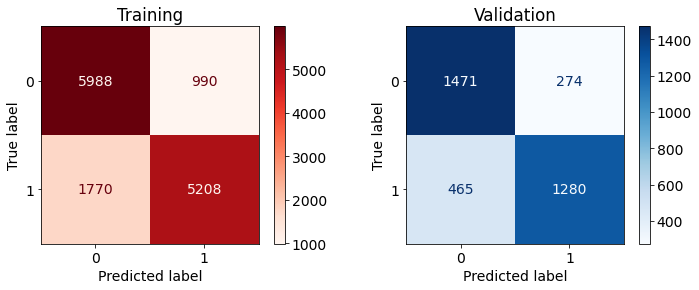

In [183]:
# Confusion matrix for Training and Validation(Random_forest_suiung_oversampling)
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))


ConfusionMatrixDisplay.from_estimator(rf_ros_best_model, X_train_ros, y_train_ros, cmap = plt.cm.Reds, ax=ax[0]);
ConfusionMatrixDisplay.from_estimator(rf_ros_best_model, X_test_ros, y_test_ros, cmap = plt.cm.Blues, ax=ax[1]);

ax[0].set_title('Training')
ax[1].set_title('Validation')

Text(0.5, 1.0, 'Training')

Text(0.5, 1.0, 'Validation')

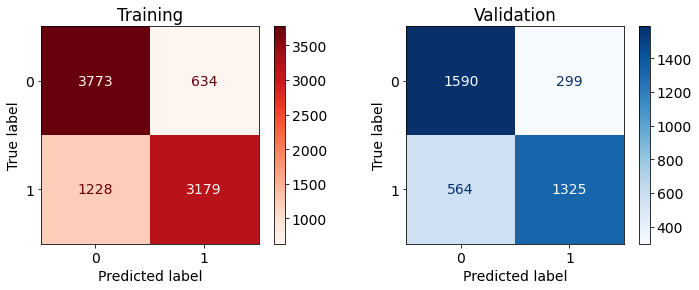

In [184]:
# Confusion matrix for Training and Validation for rf_us(random_forest_using_undersampling)
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 2, figsize = (12, 4))


ConfusionMatrixDisplay.from_estimator(rf_us, X_train_rus, y_train_rus, cmap = plt.cm.Reds, ax=ax[0]);
ConfusionMatrixDisplay.from_estimator(rf_us, X_test_rus, y_test_rus, cmap = plt.cm.Blues, ax=ax[1]);

ax[0].set_title('Training')
ax[1].set_title('Validation')

ROC AUC for training set = 0.889
ROC AUC for validation set = 0.867


Text(0.5, 0, '1-specificity')

Text(0, 0.5, 'sensitivity')

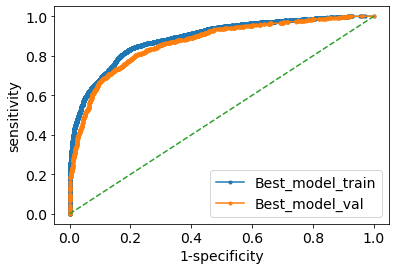

In [185]:
# ROC AUC

# Predict probabilities for the training set
bm_probs_train = rf_ros_best_model.predict_proba(X_train_ros)

# Retain probabilities for only positive outcomes
bm_probs_train = bm_probs_train[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
bm_probs_val = rf_ros_best_model.predict_proba(X_test_ros)[:, 1]

# Calculate ROC AUC scores for training and validation predictions
bm_auc_train = roc_auc_score(y_train_ros, bm_probs_train)
bm_auc_val = roc_auc_score(y_test_ros, bm_probs_val)

# Print scores
print('ROC AUC for training set = %.3f' % (bm_auc_train))
print('ROC AUC for validation set = %.3f' % (bm_auc_val))

# Calculate 1-specificity and sensitivity values for training and validation predictions
bm_1sp_train, bm_sen_train, _ = roc_curve(y_train_ros, bm_probs_train)
bm_1sp_val, bm_sen_val, _ = roc_curve(y_test_ros, bm_probs_val)

# Plot the ROC curve for the model
plt.plot(bm_1sp_train, bm_sen_train, marker = '.', label = 'Best_model_train')
plt.plot(bm_1sp_val, bm_sen_val, marker = '.', label = 'Best_model_val')
plt.plot([0,1], [0,1], linestyle = '--') # Baseline

# Set axis labels
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Neural Networks

In [186]:
X1_train.shape

(22528, 184)

In [187]:
# Define a function to create a neural network model and specify default values for variable hyperparameters
# Note: The number of hidden layers is fixed at 2
# Note: The number of neurons in the second hidden layer is fixed at 64
# Note: The output layer activation function is fixed as 'sigmoid'
# Note: The variable hyperparameters list is the activation functions of the hidden layers and number of neurons in the first hidden layer
def create_nn(activation_function = 'relu',
              hidden1_neurons = 256,
              learning_rate = 0.001):

    # Declare an instance of an artificial neural network model using the 'Sequential()' method
    nn = Sequential()

    # keras.Input is the input layer of the neural network
    keras.Input(shape=(X1_train.shape[1],))

    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 'hidden1_neurons'  - This specifies the number of neurons in the hidden layer
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units= hidden1_neurons, activation= activation_function))

    # Add a hidden layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 64  - This specifies the number of neurons in the hidden layer
    # Note: Set the 'activation' parameter to 'activation_function' - This specifies the activation function parameter defined in the custom function
    nn.add(Dense(units=64, activation = activation_function))

    # Add the output layer using the 'add()' and 'Dense()' methods
    # Note: Set the 'units' parameter to 1 - Binary classification
    # Note: Set the 'activation' parameter to 'sigmoid' - The sigmoid activation function is used for output layer neurons in binary classification tasks
    nn.add(Dense(units=1, activation= 'sigmoid'))

   
    
    # Compile the model using the 'compile()' method
    # Note: Set the 'loss' parameter to 'binary_crossentropy' - The binary crossentropy loss function is commonly used for binary classification tasks
    # Note: Set the 'metrics' parameter to 'accuracy' - This records the accuracy of the model along with the loss during training
    # Note: Set the 'optimizer' parameter to 'RMSprop' and set its 'learning_rate' parameter to 'learning_rate_value' - This specifies the learning rate value defined in the custom function
    learning_rate=0.001
    nn.compile(loss='binary_crossentropy', metrics= 'accuracy',
               optimizer=RMSprop(learning_rate = learning_rate))
    
    return nn
   

In [188]:
from sklearn.utils import validation
# Create a default neural network using the 'create_nn' function and train it on the training data
nn1 = create_nn()

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Set the 'epochs' parameter to 10 - This specifies the scope of loss computations and parameter updates

input_shape= X1_train.shape
nn1.build(input_shape)

nn1.summary()
print('\n')
nn1_history = nn1.fit(X1_train, y_train,validation_data=(X1_test, y_test), epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (22528, 256)              47360     
                                                                 
 dense_1 (Dense)             (22528, 64)               16448     
                                                                 
 dense_2 (Dense)             (22528, 1)                65        
                                                                 
Total params: 63,873
Trainable params: 63,873
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
704/704 [==============================] - 2s 2ms/step - loss: 23.3760 - accuracy: 0.7072 - val_loss: 3.0199 - val_accuracy: 0.7563
Epoch 2/10
704/704 [==============================] - 1s 2ms/step - loss: 0.9765 - accuracy: 0.7686 - val_loss: 0.5549 - val_accuracy: 0.7755
Epoch 3/10
704/704 [=========

In [189]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,23.376040,0.707209,3.019869,0.756325
2,0.976533,0.768555,0.554932,0.775499
3,0.643010,0.777255,0.657947,0.775100
4,0.640469,0.774814,0.587127,0.777097
5,0.594666,0.779075,0.777035,0.775233
6,0.613252,0.778587,0.560176,0.768309
7,0.641478,0.782227,0.601523,0.772570
8,0.638847,0.781072,0.536123,0.778429
9,0.568460,0.782981,0.669811,0.732756


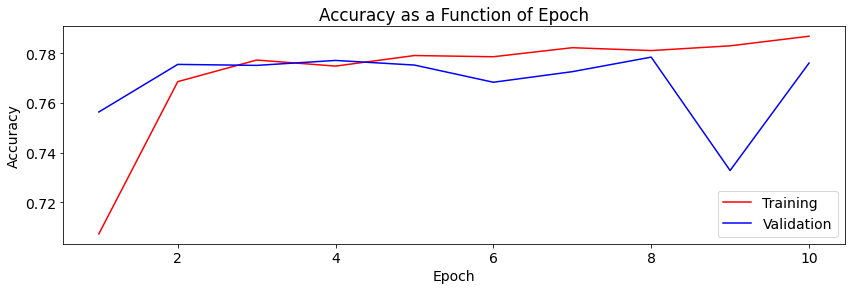

In [190]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [191]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(X1_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

235/235 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7760
The loss value of the model on the validation data is 0.5421428680419922
The accuracy of the model on the validation data is 0.7760319709777832


In [192]:
# Initialize a basic NN object using the 'KerasClassifier()' method
# Note: Set the 'build_fn' parameter to 'create_nn' - This converts the 'create_nn' function into a 'KerasClassifier' object
base_grid_model = KerasClassifier(build_fn= create_nn)

# Define a list of 'activation_function' and 'hidden1_neurons' parameters and store it in a parameter grid dictionary
parameters_grid = {'activation_function': ['relu','sigmoid'],
                   'hidden1_neurons': [256, 512]}

# Perform a grid search using the 'GridSearchCV()' method to obtain a grid on which to fit the training data
grid = GridSearchCV(estimator= base_grid_model, param_grid= parameters_grid,
                    cv=2, verbose=4)

# Train the model on the training data using the 'fit()' method
grid_model = grid.fit(X1_train, y_train,batch_size=32, epochs=10)

# Print the optimal values of 'activation_function' and 'hidden1_neurons'
best_activation_function = grid_model.best_params_['activation_function']
best_hidden1_neurons = grid_model.best_params_['hidden1_neurons']
best_accuracy = grid_model.best_score_

print('\n The optimal value of convolution filter size is', best_activation_function)
print('\n The optimal value of maxpooling filter size is', best_hidden1_neurons)
print('\n The accuracy of the model with these optimal parameters is ', best_accuracy)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/10
352/352 [==============================] - 1s 2ms/step - loss: 37.2482 - accuracy: 0.6647
Epoch 2/10
352/352 [==============================] - 1s 2ms/step - loss: 10.2371 - accuracy: 0.7204
Epoch 3/10
352/352 [==============================] - 1s 2ms/step - loss: 1.8627 - accuracy: 0.7599
Epoch 4/10
352/352 [==============================] - 1s 2ms/step - loss: 0.6487 - accuracy: 0.7718
Epoch 5/10
352/352 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.7745
Epoch 6/10
352/352 [==============================] - 1s 2ms/step - loss: 0.6818 - accuracy: 0.7783
Epoch 7/10
352/352 [==============================] - 1s 3ms/step - loss: 0.6180 - accuracy: 0.7781
Epoch 8/10
352/352 [==============================] - 1s 3ms/step - loss: 0.5571 - accuracy: 0.7815
Epoch 9/10
352/352 [==============================] - 1s 2ms/step - loss: 0.5870 - accuracy: 0.7865
Epoch 10/10
352/352 [==================

In [193]:
# Retrain the model with the optimal combination of hyperparameters and save its training history

# Use the 'create_nn' function to create a NN with the optimal values of 'filter_size' and 'pool_filter_size'
# Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the optimal value for the 'activation_function' parameter
# Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameter
nn1 = create_nn(activation_function='sigmoid',
                hidden1_neurons= 256)

# Capture the training history of the model using the 'fit()' method
# Note: Set the 'validation_data' parameter to (X_val, y_val)
# Note: Use the default batch size or set it to 32
# Note: Set the 'epochs' parameter to 10

input_shape= X1_train.shape
nn1.build(input_shape)


nn1.summary()
print('\n')
nn1_history = nn1.fit(X1_train, y_train, validation_data= (X1_test,y_test), batch_size=32, epochs=10)
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (22528, 256)              47360     
                                                                 
 dense_31 (Dense)            (22528, 64)               16448     
                                                                 
 dense_32 (Dense)            (22528, 1)                65        
                                                                 
Total params: 63,873
Trainable params: 63,873
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
704/704 [==============================] - 2s 2ms/step - loss: 0.5246 - accuracy: 0.7555 - val_loss: 0.5132 - val_accuracy: 0.7644
Epoch 2/10
704/704 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7713 - val_loss: 0.5097 - val_accuracy: 0.7711
Epoch 3/10
704/704 [=======

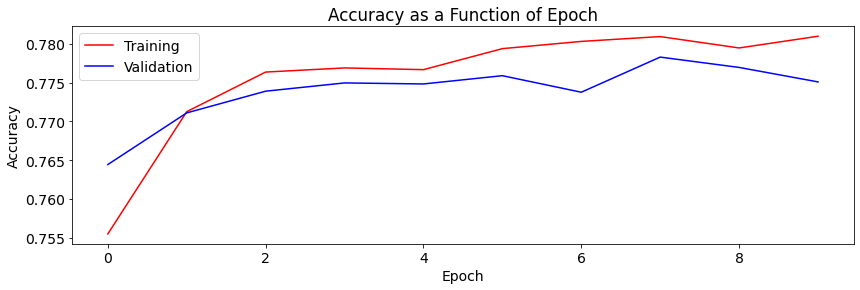

In [194]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [195]:
# Compute the accuracy of the model on the testing data set using the 'evaluate()' method
performance_test = nn1.evaluate(X1_test, y_test)

print('The loss value of the model on the test data is {}'.format(performance_test[0]))
print('The accuracy of the model on the test data is {}'.format(performance_test[1]))

235/235 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7751
The loss value of the model on the test data is 0.5136087536811829
The accuracy of the model on the test data is 0.7750998735427856


## Business Insights: Misclassification Costs
Our first step is to understand the current profitability of the telecomminucation service program, and then to is to estimate the impact of our model. We are going to use misclassification costs to study the impact. 

We are going to use \$500 as an approximation company loss for the false negative cost, and \$300 company loss for the false positive cost.
 
We are interested in finding the best cut-off that will maximize the benefit of our machine learning model.


In [196]:
# Define the false positive and false negative missclassification cost here

fn_cost = 500
fp_cost = 300

#### We will use the optimal model and its corresponding data set that was implemented in the GridSearchCV section. Let's first see the performance metrics of the trained model.

In [197]:
# Use the most optimal machine learning model that you obtained from the GridSearchCV section and the corresponding data set you used (normal, RUS or ROS)

model_name='Random forest using oversampling'

# Obtaining predictions on the training and validation sets
best_model_pred_train = rf_ros_best_model.predict(X_train_ros)
best_model_pred_test = rf_ros_best_model.predict(X_test_ros)

# Evaluating the accuracy of the training and validation sets
train_acc= rf_ros_best_model.score(X_train_ros, y_train_ros)
val_acc= rf_ros_best_model.score(X_test_ros, y_test_ros)


# Calculate the F1 score, Precision and Recall on the validation set

f_score =f1_score(y_test_ros,best_model_pred_test)
precision= precision_score(y_test_ros, best_model_pred_test)
recall= recall_score(y_test_ros, best_model_pred_test, pos_label=0)

# creating a dataframe to compare the performance of different models
new_model_eval_data = [[model_name, train_acc, val_acc, f_score, precision, recall]]
new_evaluate_df = pd.DataFrame(new_model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score',
                                          'F1 Score', 'Precision', 'Recall'])

In [198]:
new_evaluate_df

,Model Name,Training Score,Testing Score,F1 Score,Precision,Recall
0,Random forest using oversampling,0.802236,0.788252,0.775993,0.823681,0.84298


#### We now calculate the current misclassification cost in the validation set.

In [199]:
# Obtain the count of false positive and false negative classifications from your model

cf = confusion_matrix(y_test_ros, rf_ros_best_model.predict(X_test_ros)) # Matrix form of confusion matrix

fp_count = cf[0,1]
fn_count = cf[1,0]

# Calculate the total misclassification cost using the FN and FP cost and FN and FP count

misclassification_cost= fp_count*fp_cost + fn_count*fn_cost

print('Number of False Positives: %d' % fp_count)
print('Number of False Negatives: %d' % fn_count)
print('Prediction Misclassification Cost: %.2f' % misclassification_cost)

Number of False Positives: 274
Number of False Negatives: 465
Prediction Misclassification Cost: 314700.00


#### We now calculate the misclassification cost as we raise the cut-off value from 0 to 1.

In [200]:
# Predict probabilities for the training set and retain them for only positive outcomes
best_model_probs_train = rf_ros_best_model.predict_proba(X_train_ros)[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
best_model_probs_test = rf_ros_best_model.predict_proba(X_test_ros)[:, 1]

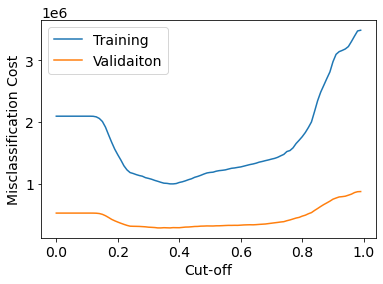

Best Misclassification Cost on the training is 996500.00 at Cut-off 0.380
Applying that cut-off to the validation data results in Misclassification Cost of 288000.00 


In [201]:
# Calculate and store the misclassification costs for different values of cut-off probability
cost_train = []
cost_val=[]


for cutoff in np.arange(0, 1, 0.01):
    # Get the classification predictions using the probabilities obtained for the training data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_train array
    curr_preds_train = np.where(best_model_probs_train > cutoff , 1, 0)
    curr_cf_train= confusion_matrix(y_train_ros, curr_preds_train)
    train_fp_count = curr_cf_train[0,1]
    train_fn_count = curr_cf_train[1,0]

    curr_misclassification_cost_train = train_fp_count*fp_cost + train_fn_count*fn_cost
    cost_train.append(curr_misclassification_cost_train)

    # Get the classification predictions using the probabilities obtained for the validation data set and the cutoff
    # Get the false positive and false negative count from the predictions
    # Calculate the training misclassification cost and append it to the cost_val array
    curr_preds_test = np.where(best_model_probs_test > cutoff , 1, 0)
    curr_cf_test= confusion_matrix(y_test_ros, curr_preds_test)
    test_fp_count = curr_cf_test[0,1]
    test_fn_count = curr_cf_test[1,0]


    curr_misclassification_cost_test = test_fp_count*fp_cost + test_fn_count*fn_cost
    cost_val.append(curr_misclassification_cost_test)

# Get the X values (cut-off values)
cutoffs = np.arange(0, 1, 0.01)


# Plot misclassification cost against cut-off value
plt.plot(cutoffs,cost_train, label='Training')
plt.plot(cutoffs,cost_val, label='Validaiton')
plt.xlabel('Cut-off')
plt.ylabel('Misclassification Cost')
plt.legend()
plt.show()

# Find the minimum misclassification cost and its associated cut-off value based on the training data
best_cost = min(cost_train)
best_cutoff = cutoffs[cost_train.index(best_cost)]

#apply the cut-off value to the validation data
best_valcost = cost_val[cost_train.index(best_cost)]


print('Best Misclassification Cost on the training is %.2f at Cut-off %.3f' % (best_cost, best_cutoff));
print('Applying that cut-off to the validation data results in Misclassification Cost of %.2f ' % best_valcost);